<a href="https://colab.research.google.com/github/candace-b/AirBNB-Analysis/blob/main/HillCountry_AirBnB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As Austin, TX continues to boom, the surrounding areas are seeing growth too. Cities like Dripping Springs, Wimberley, and Georgetown were already popular wedding sites, and weekend getaways, but the draw to these areas seems to be increasing. This project seeks to evaluate if there are opportunities for Airbnb investors to expand their properties outside of the congested areas, and into fresher waters.

## Overview

1) Data cleaning 

2) Zip Code treatments

3) Univariate Analysis

4) Which AirBnB hosts have the most listings?

5) Establishing metrics for revenue and frequency

6) How does unit price vary by neighborhood? 

7) Results

#### Data Dictionary
Data Source: http://insideairbnb.com/explore/

*   id-		Airbnb's unique identifier for the listing
*   name- Name of AirBnB listing		
*   host_id- unique id given to AirBnB hosts.		
*   host_name- first name of AirBnB owner. 
*   neighbourhood_group	The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
*   neighbourhood	The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
*   latitude	Uses the World Geodetic System (WGS84) projection for latitude and longitude.
*   longitude Uses the World Geodetic System (WGS84) projection for latitude and longitude.
room_type	string		
*   price	daily price in local currency. Note, $ sign may be used despite locale
minimum_nights		minimum number of night stay for the listing (calendar rules may be different)
*   number_of_reviews		The number of reviews the listing has
*   last_review	date		The date of the last/newest review
*   calculated_host_listings_count	The number of listings the host has in the *   current scrape, in the city/region geography.
*   availability_365	avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host.
*   number_of_reviews_ltm	The number of reviews the listing has (in the last 12 months)
*   license			
			

###1) Data Cleaning

In [ ]:
# Import Necessary Libraries 

# To work with dataframes
import pandas as pd
import numpy as np
from datetime import datetime

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.2f" % x)
%matplotlib inline
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
# Allow google Colab access to my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/ColabNotebooks/Tableau/listings.csv')
reviews=pd.read_csv('/content/drive/My Drive/ColabNotebooks/Tableau/reviews.csv')

In [ ]:
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns in the dataset.')
print('There are', reviews.shape[0], 'rows and', reviews.shape[1], 'columns in the dataset.')

There are 18337 rows and 18 columns in the dataset.
There are 649234 rows and 2 columns in the dataset.


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,319887,Quaint East Austin 2BR SXSW 2016,1640158,Jeremy,NaN,78702,30.25,-97.73,Entire home/apt,694,4,2,2015-03-18,0.02,1,0,0,NaN
1,319894,The Perfect Austin Modern Home,1640172,Gary,NaN,78724,30.28,-97.65,Entire home/apt,192,2,171,2022-09-11,1.34,2,156,36,NaN
2,46856014,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",375760981,Niza,NaN,78611,30.81,-98.37,Entire home/apt,194,2,88,2022-08-28,4.17,1,342,47,NaN
3,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26,-97.73,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,NaN
4,321675,3/2 House w/ Pool in Barton Hills,1142525,James,NaN,78704,30.25,-97.79,Entire home/apt,500,1,13,2015-10-04,0.11,1,0,0,NaN


In [ ]:
reviews.head()

,listing_id,date
0,5456,2009-03-08
1,46856014,2020-12-19
2,46856014,2020-12-30
3,46856014,2021-01-17
4,46856014,2021-02-02


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18337 entries, 0 to 18336
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18337 non-null  int64  
 1   name                            18337 non-null  object 
 2   host_id                         18337 non-null  int64  
 3   host_name                       18218 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   18337 non-null  int64  
 6   latitude                        18337 non-null  float64
 7   longitude                       18337 non-null  float64
 8   room_type                       18337 non-null  object 
 9   price                           18337 non-null  int64  
 10  minimum_nights                  18337 non-null  int64  
 11  number_of_reviews               18337 non-null  int64  
 12  last_review                     

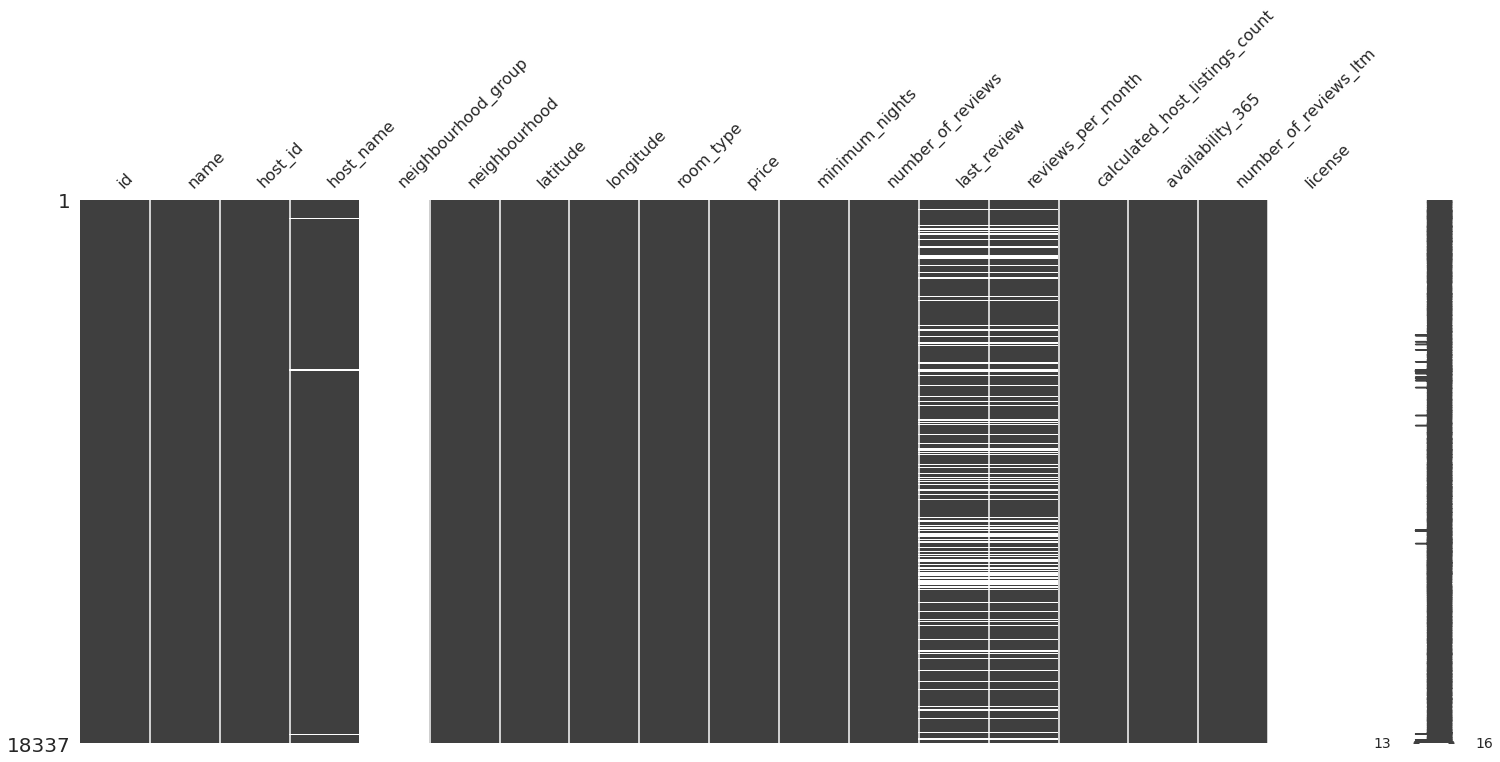

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                           119
neighbourhood_group               18337
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3403
reviews_per_month                  3403
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           18337
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18337.00,169714502984181440.00,281079474446201376.00,5456.00,23697234.00,46490468.00,557330216989611456.00,714033248937043712.00
host_id,18337.00,135670469.42,141598959.67,23.00,19688980.00,81745571.00,219500569.00,479076909.00
neighbourhood_group,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,18337.00,78697.19,98.73,76530.00,78669.00,78704.00,78739.00,78759.00
latitude,18337.00,30.30,0.15,29.67,30.24,30.27,30.36,31.04
longitude,18337.00,-97.81,0.19,-98.61,-97.82,-97.75,-97.72,-97.19
price,18337.00,380.30,1115.49,0.00,100.00,169.00,296.00,23000.00
minimum_nights,18337.00,6.62,23.32,1.00,1.00,2.00,3.00,1100.00
number_of_reviews,18337.00,35.41,71.06,0.00,1.00,9.00,36.00,1062.00
reviews_per_month,14934.00,1.67,1.78,0.01,0.37,1.09,2.38,35.18


Initial Observations: 

*   The columns `neighhborhood group` and `liscense` are missing all values. 
*   `Neighborhood` is a misleading column name and can be changed to zip code for clarification. 
*   `Last review` needs to be converted to date variable.
*   `Last_review` and `reviews per month` will be valuable insights, and after univariate analysis missing values will be treated. 
*   There is no column for the county the airbnb is listed in, or what area of the hill country. I will need to create these columns. 
*   `Price` has 0 minimum which is essentially a null value. It also has major outliers such as 23,000 per night. 



---



In [ ]:
# Rename neighborhood to zip_code
df.columns=df.columns.str.replace('neighbourhood','zip_code')

# Drop columns with all missing values
df.drop('zip_code_group', axis=1, inplace=True)
df.drop('license', axis=1, inplace=True)

# Convert last_review to date format
df['last_review']=pd.to_datetime(df['last_review'])

# Convert zip code to categorical so data can be binned
df['zip_code']=df['zip_code'].astype('string')

### 2) Zip Code Treatments

In [ ]:
print('There are', (df['zip_code'].nunique()), 'unique zip codes.')

There are 80 unique zip codes.


**After diving into the 80 zip codes in this data the following became apparent:** 

*   Many of these zip codes represent satelite cities including Pflugerville, Buda, Round Rock, and Leander. These areas are close enough to be considered as viable places to stay to visit Austin while on a budget. 
*   Outter cities such as Dripping Springs, Blanco, and Bastrop have a high density of wedding venues, breweries, and distilleries and are often part of people's agenda when visitng the Austin area. 
*   For this reason the 80 unique zip codes are all relevant to this analysis. 
*   The zip code column is too granular for evaluation. So instead data will be binned into larger categories: County and Area. 
 


**County column:**
*   Bastrop
*   Blanco
*   Burnet
*   Caldwell
*   Hays
*   Travis
*   Williamson



**Area column:** This will establish if the AirBnB is located in Austin or the surrounding Hill Country:
*   Austin
*   North Hill Country
*   Northwest Hill Country
*   Northeast Hill Country
*   South Hill Country
*   Southeast Hill Country
*   Southwest Hill Country

In [ ]:
# Group zip codes by County
bastrop = [
    "78602",
    "78612",
    "78621",
    "78662",
]

blanco = [
    "78636",
    "78663",
]

burnet = [
    "78605",
    "78611",
]

caldwell = [
    "78616",
    "78655",
    "78656",
    "78644",
]

hays = [
    "78619",
    "78620",
    "78640",
    "78666",
    "78676",
]

travis = [
    "78610",
    "78613",
    "78615",
    "78617",
    "78641",
    "78645",
    "78652",
    "78653",
    "78654",
    "78660",
    "78664",
    "78669",
    "78701",
    "78702",
    "78703",
    "78704",
    "78705",
    "78712",
    "78717",
    "78719",
    "78721",
    "78722",
    "78723",
    "78724",
    "78725",
    "78726",
    "78727",
    "78728",
    "78730",
    "78731",
    "78732",
    "78733",
    "78734",
    "78735",
    "78736",
    "78737",
    "78738",
    "78739",
    "78741",
    "78742",
    "78744",
    "78745",
    "78746",
    "78747",
    "78748",
    "78749",
    "78750",
    "78751",
    "78752",
    "78753",
    "78754",
    "78756",
    "78757",
    "78758",
    "78759",
]

williamson = [ 
    "78626",
    "78628",
    "78634",
    "76530",
    "78729",
    "78642",
    "78681",
    "76574",
]

In [ ]:
# Create a method to combine zip codes into areas of texas
def counties_of_texas(x):
  if x in bastrop:
    return "Bastrop County"
  if x in blanco:
    return "Blanco County"
  if x in burnet: 
    return "Burnet County"
  if x in caldwell:
    return "Caldwell County"
  if x in hays:
    return "Hays County"
  if x in travis:
    return "Travis County"
  if x in williamson:
    return "Williamson County"

In [ ]:
# Filling area column
df["county"]=df["zip_code"].apply(counties_of_texas)

In [ ]:
# Group zip codes by area around Austin
austin = [
    "78701",
    "78703",
    "78704", 
    "78705", 
    "78712",
    "78751",
    "78752", 
    "78756", 
    "78757",
    "78702",
    "78722",
    "78721",
    "78723",
    "78724",
    "78727",
    "78730",
    "78731",
    "78732",
    "78734",
    "78750",
    "78759",
    "78748",
    "78704",
    "78741", 
    "78744", 
    "78747", 
    "78735", 
    "78736", 
    "78738", 
    "78739",
    "78745",
    "78748",
    "78749",
    "78733", 
    "78746", 
]

north_hill_country= [
    "76530",
    "76574",
    "78613",
    "78615",
    "78626",
    "78628",
    "78634",
    "78641",
    "78642",
    "78660",
    "78664",
    "78681",
    "78717",
    "78726",
    "78728",
    "78729",
    "78753",
    "78758",
]

northeast_hill_country= [
    "78653",
    "78725",
    "78742",
    "78754",
]

northwest_hill_country= [
    "78605",
    "78611",
    "78645",
    "78654",
    "78669",
]

south_hill_country= [
    "78610",
    "78616",
    "78640",
    "78644",
    "78652",
    "78655",
    "78656",
    "78666",
]

southeast_hill_country= [
    "78602",
    "78612",
    "78617",
    "78621",
    "78662",
]

southwest_hill_country= [
    "78619",
    "78620",
    "78636",
    "78663",
    "78676",
    "78719",
    "78737",
]

In [ ]:
# Create a method to combine zip codes into areas of texas
def area_of_texas(x):
  if x in austin:
    return "Austin"
  if x in north_hill_country:
    return "North Hill Country"
  if x in northeast_hill_country:
    return "Northeast Hill Country"
  if x in northwest_hill_country:
    return "Northwest Hill Country"
  if x in south_hill_country:
    return "South Hill Country"
  if x in southeast_hill_country:
    return "Southeast Hill Country"
  if x in southwest_hill_country:
    return "Southwest Hill Country"

In [ ]:
# Filling area column
df["area"]=df["zip_code"].apply(area_of_texas)

In [ ]:
df.head()

,id,name,host_id,host_name,zip_code,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,county,area
0,319887,Quaint East Austin 2BR SXSW 2016,1640158,Jeremy,78702,30.25,-97.73,Entire home/apt,694,4,2,2015-03-18,0.02,1,0,0,Travis County,Austin
1,319894,The Perfect Austin Modern Home,1640172,Gary,78724,30.28,-97.65,Entire home/apt,192,2,171,2022-09-11,1.34,2,156,36,Travis County,Austin
2,46856014,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",375760981,Niza,78611,30.81,-98.37,Entire home/apt,194,2,88,2022-08-28,4.17,1,342,47,Burnet County,Northwest Hill Country
3,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26,-97.73,Entire home/apt,140,2,614,2022-08-28,3.73,1,311,43,Travis County,Austin
4,321675,3/2 House w/ Pool in Barton Hills,1142525,James,78704,30.25,-97.79,Entire home/apt,500,1,13,2015-10-04,0.11,1,0,0,Travis County,Austin


### 3) Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Some businesses have 0 dollar prices, we will replase $0 prices with the median instead. 

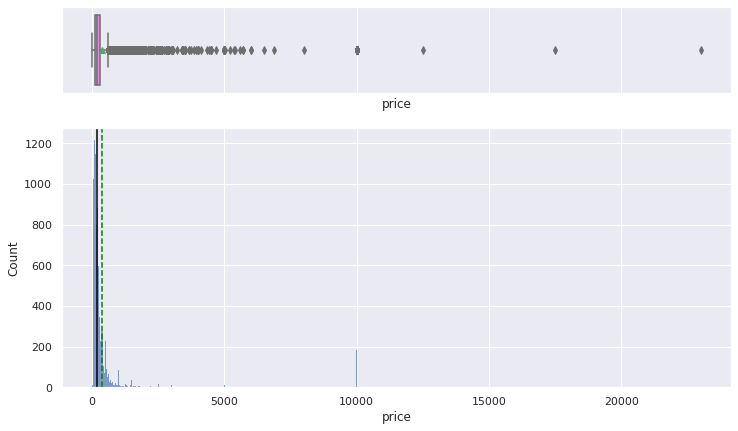

In [ ]:
# Change 0 values in price to null values
df['price']=df['price'].replace(0, np.nan)
# Replace null values with the median
df['price'].fillna(df['price'].median())
histogram_boxplot(df, 'price')

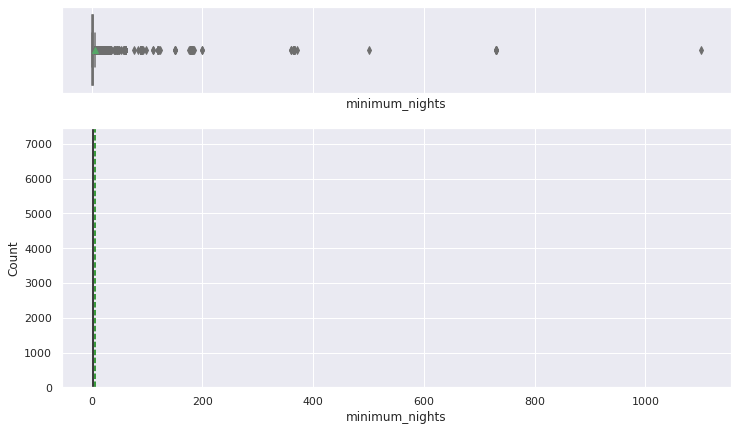

In [ ]:
histogram_boxplot(df, 'minimum_nights')

Some of these outliers have minimum nights greater than a year, could these be year long rental properties or data entry. This column will not be used in analysis so I won't treat it. 

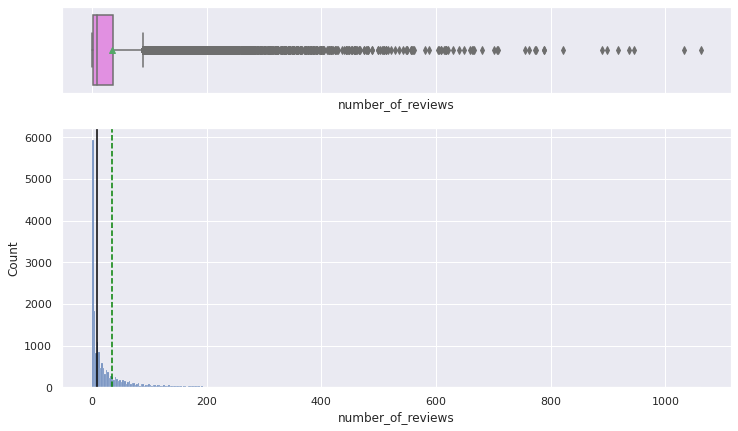

In [ ]:
histogram_boxplot(df, 'number_of_reviews')

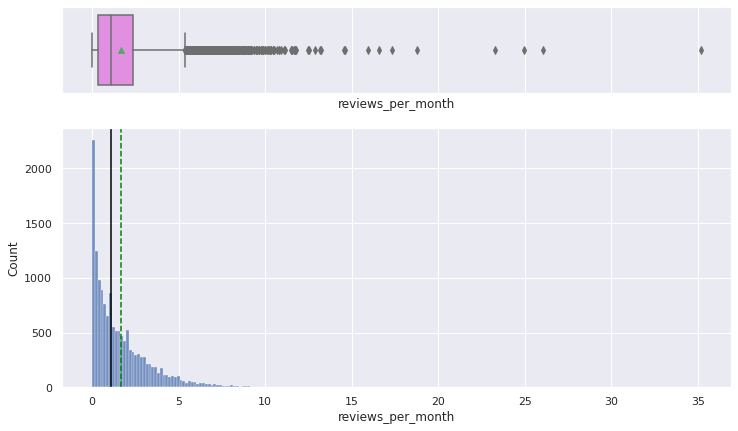

In [ ]:
histogram_boxplot(df, 'reviews_per_month')

The reviews per month feature lessens the gap between the most successful AirBnBs with an average AirBnB listing compared to the reviews column. 

For example the most successful host will have 1000 reviews in the 'reviews' column,and only 35 reviews/month in the reviews per month column. Compared to a moderately successful new AirBnB having less than 50 lifetime reviews, but having 10 reviews/month. 

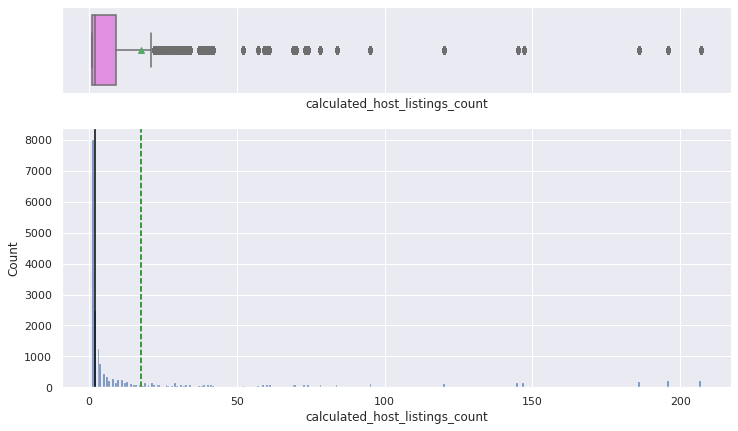

In [ ]:
histogram_boxplot(df, 'calculated_host_listings_count')

This column is insightful to understand market competition. What areas are most impacted by the companies which own over 100 listings?  




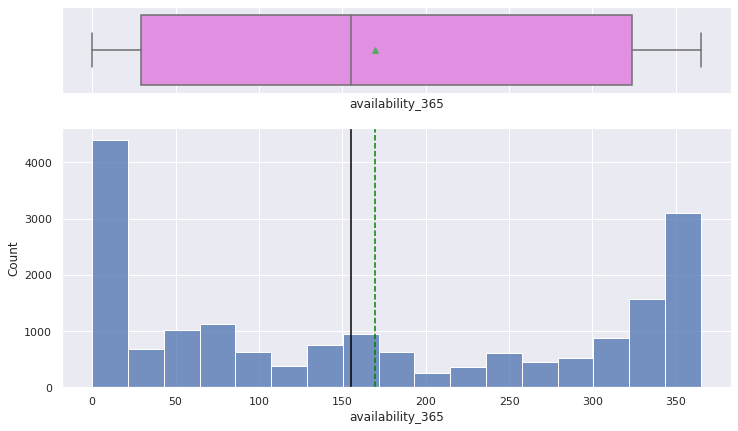

In [ ]:
histogram_boxplot(df, 'availability_365')

Per the data dictionary, this column can be impacted by number of bookings or owners taking their property off the market for a time. For this reason I won't rely on this column for insight. 

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

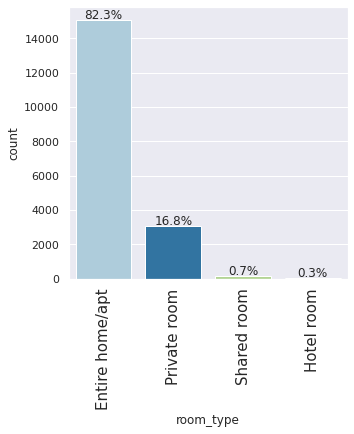

In [ ]:
labeled_barplot(df, 'room_type', perc=True)

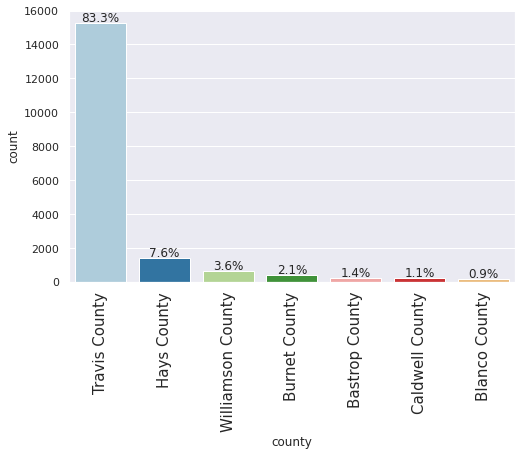

In [ ]:
labeled_barplot(df, 'county', perc=True)

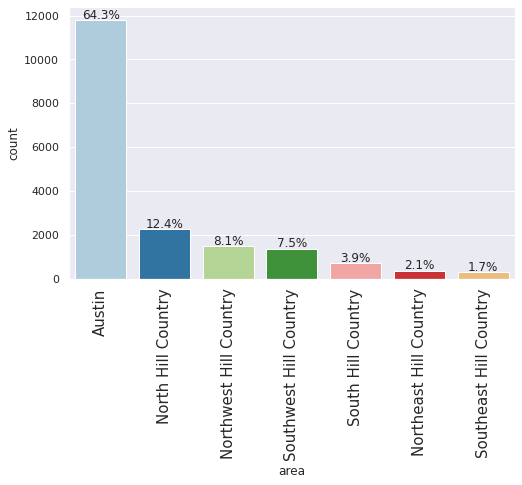

In [ ]:
labeled_barplot(df, 'area', perc=True)

Besides Austin, North Hill Country has the most rental listings. This area consists of properties in parts of Granger, Pflugeerville, and Cedar Park. 

In [ ]:
granular_cols=['host_name', 'host_id', 'last_review']
for column in granular_cols:
  print(df[column].value_counts())
  print('-'*50)

Vacasa Texas                    460
WanderJaunt                     196
Hill Country Premier Lodging    186
Evolve                          180
Landing                         145
                               ... 
Jorrele                           1
Caro                              1
Matt And Isabel                   1
Gaylen                            1
Lashonda                          1
Name: host_name, Length: 3858, dtype: int64
--------------------------------------------------
26497220     207
104309976    196
107378253    186
124060715    147
263502162    145
            ... 
22307232       1
3976575        1
240859100      1
22240862       1
270602249      1
Name: host_id, Length: 10214, dtype: int64
--------------------------------------------------
2022-09-05    1193
2022-09-11     866
2022-08-28     651
2022-09-04     522
2022-08-21     479
              ... 
2020-03-25       1
2017-07-10       1
2020-07-30       1
2020-02-12       1
2018-11-21       1
Name: last_review, 

Now that the data has been cleaned, new features have been created, and missing values treated, the remaining business questions will be visualized using Tableau. 

In [ ]:
# export data to a csv file
from google.colab import files
df.to_csv('newlistings.csv')
files.download('newlistings.csv')

Check out the Tableau dashboard created with the processed data [here](https://public.tableau.com/views/HillCountryAirbnbProject/AirBnBSWOT2?:language=en-US&:display_count=n&:origin=viz_share_link)! 

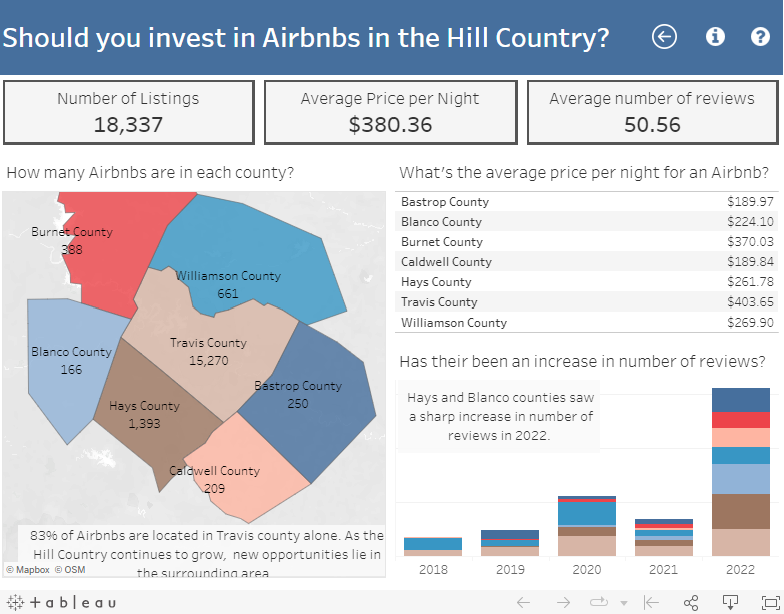

